In [ ]:
#Imports

#import will2live
from pywaffle import Waffle
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

Images and proprietary data has been removed, this is a script of EDA and visualization creation.
Some code has been modified (Strings changed, metrics redacted, and images replaced with edited screenshots)
to maintain confidentiality

In [ ]:
# Type in month that you want
month="April"

In [ ]:
# User detect

user=os.getcwd()
userloc=user.find("Users")
userloc=userloc+6
user=user[userloc:]
userloc=user.find('\\')
user=user[:userloc]
del(userloc)

In [ ]:
# Creating filepath and reading file 

path='C:\\Users\\me\\2023\\file.xlsx'
sheetname="sheetnames"
path=path.replace('me',user)

In [ ]:
df=pd.read_excel(path,sheet_name=sheetname)

In [ ]:
# Renaming some things in our dataframe

test_values=list(df.columns)
test_values[6]='Date (Daily)'

dictionary1 = {list(df.columns)[i]: test_values[i] for i in range(len(list(df.columns)))}


df.rename(dictionary1,inplace=True,axis=1)

In [ ]:
# Reading in lookup files 
# and renaming columns 

path='C:\\Users\\path\\ref.xlsx'
path=path.replace('me',user)
paid_lookup=pd.read_excel(path,sheet_name='Format_Lookup')
organic_lookup=pd.read_excel(path,sheet_name='Format_Lookup2')


organic_lookup.rename({'Ad Format':'Ad Format', 'Ad Format Grouping (What we group it into)':'Ad Format Group'},inplace=True,axis=1)
paid_lookup.rename({'Ad Format':'Ad Format', 'Ad Format Grouping (What we group it into)':'Ad Format Group'},inplace=True,axis=1)

In [ ]:
#Filtering data frame to certain time period

df=df[df['Year Formula']==2023]
df=df[df['Month Formula']==month]
df.head()



In [ ]:
set(list(df['Ad Format'].values))

In [ ]:
badformat=['nan','Deleted','Do Not Use']

In [ ]:
df['Ad Format'].isin(badformat)

In [ ]:
df=df[~df['Ad Format'].isin(badformat)]

In [ ]:
df.columns

In [ ]:
# Define function to create Organic vs Paid Column

def org_or_paid(x):
    if 'organic' in x.lower():
        return('Organic')    
    elif 'paid' in x.lower():
        return('Paid')
    elif 'promoted' in x.lower():
        return('Paid')
    else:
        return('ERROR')

In [ ]:
# Apply function to create Paid/Organic column

df['Paid/Organic']=df['Tactic'].apply(org_or_paid)

In [ ]:
# Drop unnecessary columns
list_here=['represents','list','of','values','.','Removed for safety/privacy']
df=df.drop(list_here,axis=1)
df.head()

In [ ]:
# Split into two dataframes before joining to lookup tables

df_paid=df[df['Paid/Organic']=='Paid']
df_organic=df[df['Paid/Organic']=='Organic']


# Then each one will get joined to its correct lookup table, then we'll concatenate the two completed dataframes

In [ ]:
# Join to lookup Tables

df_paid=pd.merge(df_paid,paid_lookup,on='Ad Format',how='inner')
df_organic=pd.merge(df_organic,organic_lookup,on='Ad Format',how='inner')

In [ ]:
# Recombine the two frames (after adding Format Groupings)

df=pd.concat([df_organic,df_paid])

# Create column to easily count columns even with null values
df['Count']=1

In [ ]:
# Recreate Paid/Organic frames
# by copying and filtering the newest updated df

df_paid=df.copy()
df_organic=df.copy()
df_paid=df_paid[df_paid['Paid/Organic']=='Paid']
df_organic=df_organic[df_organic['Paid/Organic']=='Organic']

In [ ]:
#### Creating overall Data Frame with Percentages 
# (we will do this at least 3x)

# Once for Combo,
# Once for Paid,
# Once for Organic.

# Combo First

df_agg=df.groupby(['Ad Format Group']).agg({'Metric1': 'sum',
                                            'Metric2 ':'sum',
                                            'Metric3':'sum',
                                            'Metric4':'sum','Media Spend':'sum',
                                            'Count':'sum'})


for x in df_agg.columns:
    newname = x + ": Percent"    
    col_sum = df_agg[x].sum()
    df_agg[newname] = df_agg[x].apply(lambda y: (y / col_sum) * 100)



In [ ]:
## Paid Percentage frame

df_agg=df.groupby(['Ad Format Group']).agg({'Metric1': 'sum',
                                            'Metric2 ':'sum',
                                            'Metric3':'sum',
                                            'Metric4':'sum','Media Spend':'sum',
                                            'Count':'sum'})

for x in df_paid_agg.columns:
    newname = x + ": Percent"    
    col_sum = df_paid_agg[x].sum()
    df_paid_agg[newname] = df_paid_agg[x].apply(lambda y: (y / col_sum) * 100)



In [ ]:
## Organic Percentage frame

df_organic_agg=df_organic.groupby(['Ad Format Group']).agg({'Impressions': 'sum',
                                            'Total Engagements ':'sum',
                                            'Total S':'sum',
                                            'Clicks':'sum','Media Spend':'sum',
                                            'Count':'sum'})


for x in df_organic_agg.columns:
    newname = x + ": Percent"    
    col_sum = df_organic_agg[x].sum()
    df_organic_agg[newname] = df_organic_agg[x].apply(lambda y: (y / col_sum) * 100)



In [ ]:
df_organic_agg.drop(['Media Spend','Media Spend: Percent'],axis=1,inplace=True)
df_paid_agg.drop(['Count','Count: Percent'],axis=1,inplace=True)

In [ ]:
df_organic_agg.to_excel('Organic_Formats.xlsx')
df_paid_agg.to_excel('Paid_Formats.xlsx')

In [ ]:
df_org_perc=df_organic_agg.drop(['Impressions',
                                 'Total Engagements (includes video views)',
                                 'Total S',
                                 'Clicks',
                                'Count'],axis=1)

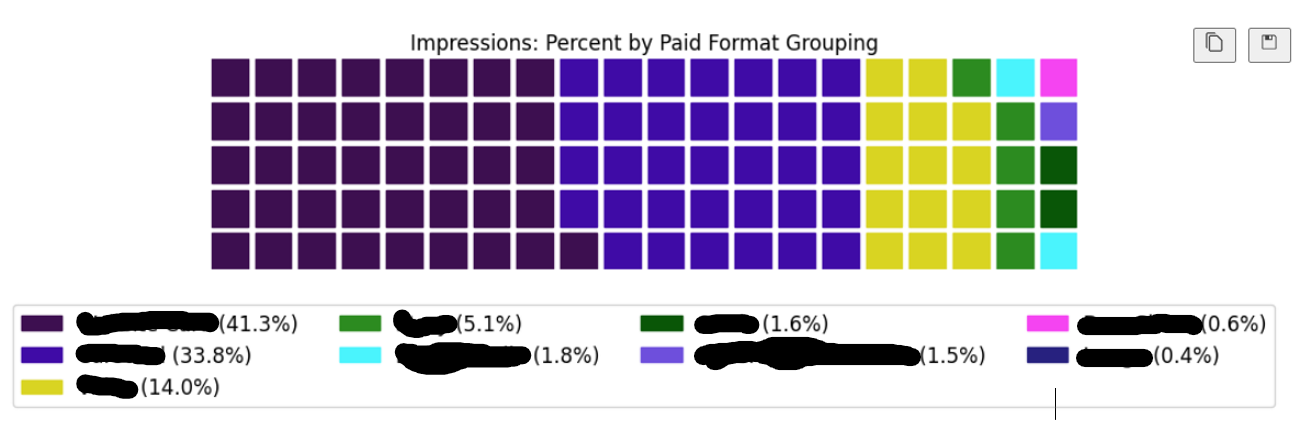

In [ ]:
df_paid_perc=df_paid_agg.drop(['Impressions',
                                 'Total Engagements (includes video views)',
                                 'Total S',
                                 'Clicks','Media Spend'],axis=1)

In [ ]:
df_org_perc

In [ ]:
df_paid_perc

In [ ]:
df_paid_perc.to_excel('Paid Percentages by Format.xlsx')
df_org_perc.to_excel('Organic Percentages by Format.xlsx')

In [ ]:
####### DATA COMPLETE

#######

In [ ]:
import pickle
with open("hexcodes", "rb") as fp:   # Unpickling
    hexcodes = pickle.load(fp)


In [ ]:
paid_perc_df2=df_paid_perc.copy()
paid_perc_df2.reset_index(inplace=True)

In [ ]:
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)

In [ ]:
values=list(sorted_df['Impressions: Percent'])

In [ ]:
# Label Values sorted



sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Impressions: Percent'])]

colors=hexcodes[:len(sorted_df.index)]

'''
colors = ['#8dd3c7', '#deb887', '#bebada', '#fb8072', 
           '#80b1d3', '#fdb462', '#b3de69','#6ed9ce']
'''

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Impressions: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Impressions: Percent by Paid Format Grouping')

plt.show()

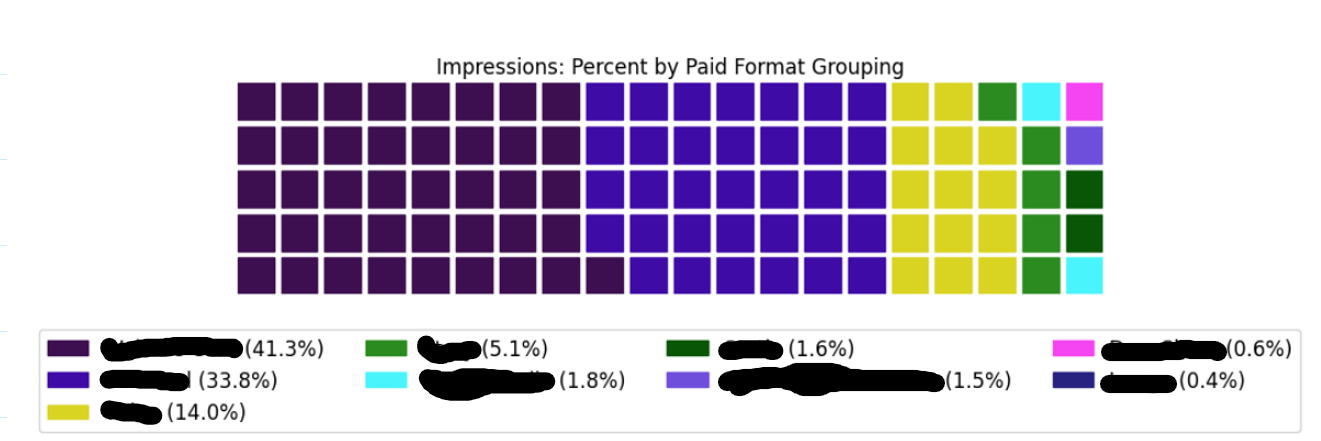

In [ ]:
# SO here, we will do a chart for every percentage ( Impressions, Eng, etc.)  for paid

# Another cell will do this for organic

# ===============
#  Impressions: Percent	Total Engagements (includes video views): Percent	Total Social S: Percent	Clicks: Percent	Media Spend: Percent
# ===============


#lith_data_df  =  df_paid_perc  =  df_organic_perc
# Well1 = 
# .LITH= ['Ad Format Group']



paid_perc_df2=df_paid_perc.copy()
paid_perc_df2.reset_index(inplace=True)


fig = plt.figure(FigureClass=Waffle, 
                 plots = {511: {'values':list(paid_perc_df2['Impressions: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Impressions: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Impr. %', 'fontsize':18}
                               },
                               
                          512: {'values':list(paid_perc_df2['Total Engagements (includes video views): Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Total Engagements (includes video views): Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Eng. %', 'fontsize':18}
                               },
                          
                         513:  {'values':list(paid_perc_df2['Clicks: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Clicks: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Click %', 'fontsize':18}
                               },
                          
                          
                          
                         514:  {'values':list(paid_perc_df2['Total S: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Total S: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'SSS %', 'fontsize':18}
                               },
                          
                          
                        515:  {'values':list(paid_perc_df2['Media Spend: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Media Spend: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Spend %', 'fontsize':18}
                               }
                          
                          
                          
                          
                         },
                 figsize=(15,10), 
                 rows=5, 
                 columns = 20, 
                 colors=colors)
                 
plt.tight_layout()
plt.show()

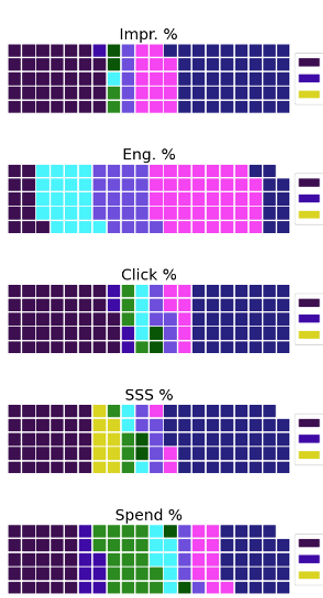

XXXX is driving 20% of Engagements, and 1.5% of Impressions at 6.6% of Spend.

In [ ]:
# PAID IMPRESSIONS

sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Impressions: Percent'])]


colors=hexcodes[:len(sorted_df.index)]




plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Impressions: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Impressions: Percent by Paid Format Grouping')

plt.show()

![image.png](attachment:image.png)

In [ ]:
# PAID ENGAGEMENTS

sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Total Engagements (includes video views): Percent'])]




colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Total Engagements (includes video views): Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.6), 
                        'ncol':4, 'fontsize':12})
plt.title('Total Engagements (includes video views): Percent by Paid Format Grouping')

plt.show()

In [ ]:
# PAID SPEND
sorted_df = paid_perc_df2.sort_values('Media Spend: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Media Spend: Percent'])]




colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Media Spend: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Media Spend: Percent by Paid Format Grouping')

plt.show()

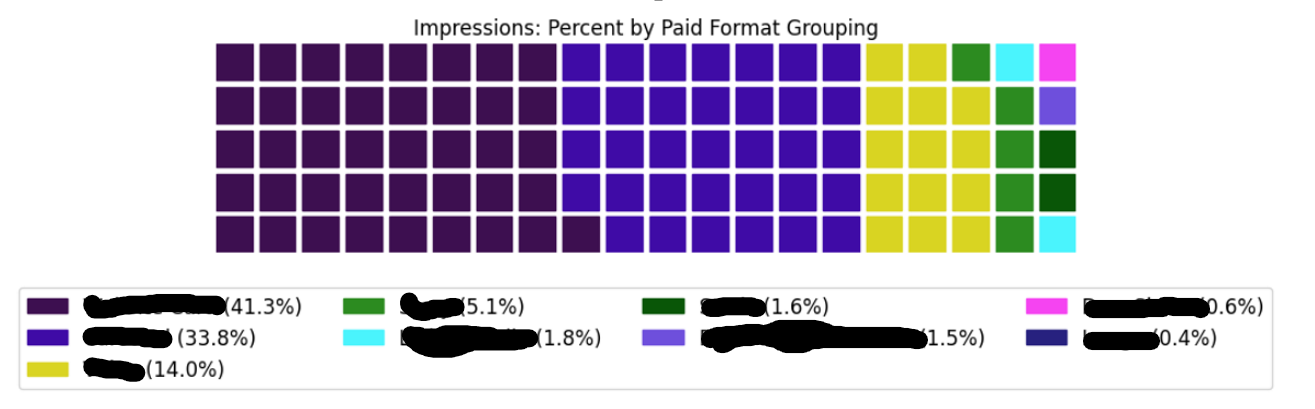

In [ ]:
# PAID CLICKS
sorted_df = paid_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Clicks: Percent'])]




colors=hexcodes[:len(sorted_df.index)]


plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Clicks: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Clicks: Percent by Paid Format Grouping')

plt.show()

In [ ]:
# PAID SSS
sorted_df = paid_perc_df2.sort_values('Total Social S: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Total S: Percent'])]




colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Total Social S: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Total Social S: Percent by Paid Format Grouping')

plt.show()

In [ ]:
##################### ORGANIC ONES
org_perc_df2=df_org_perc.copy()
org_perc_df2.reset_index(inplace=True)

In [ ]:
# ORG POSTS
sorted_df = org_perc_df2.sort_values('Count: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Count: Percent'])]

colors=hexcodes[:len(sorted_df.index)]


plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
         
           
           values=list(sorted_df['Count: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-1), 
                        'ncol':4, 'fontsize':12})
plt.title('Post Counts: Percent by Paid Format Grouping')

plt.show()

In [ ]:
# ORG Impressions
sorted_df = org_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Impressions: Percent'])]

colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Impressions: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-1), 
                        'ncol':4, 'fontsize':12})
plt.title('Impressions: Percent by Paid Format Grouping')

plt.show()

In [ ]:
# ORG Engagements
sorted_df = org_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Total Engagements (includes video views): Percent'])]

colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Total Engagements (includes video views): Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-1), 
                        'ncol':4, 'fontsize':12})
plt.title('Total Engagements (includes video views): Percent by Paid Format Grouping')

plt.show()

In [ ]:
# ORG SSS
sorted_df = org_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Total Engagements (includes video views): Percent'])]


colors=hexcodes[:len(sorted_df.index)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Total Engagements (includes video views): Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-1), 
                        'ncol':4, 'fontsize':12})
plt.title('Total Engagements (includes video views): Percent by Paid Format Grouping')

plt.show()

In [ ]:
# ORG Clicks
sorted_df = org_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Clicks: Percent'])]

colors=hexcodes[:len(sorted_df.index)]


plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Clicks: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-1), 
                        'ncol':4, 'fontsize':12})
plt.title('Clicks: Percent by Paid Format Grouping')

plt.show()

In [ ]:
paid_perc_df2.to_excel('paid_df.xlsx')
org_perc_df2.to_excel('organic_df.xlsx')

In [ ]:
# SO here, we will do a chart for every percentage ( Impressions, Eng, etc.)  for paid

# Another cell will do this for organic

# ===============
#  Impressions: Percent	Total Engagements (includes video views): Percent	Total Social S: Percent	Clicks: Percent	Media Spend: Percent
# ===============


#lith_data_df  =  df_paid_perc  =  df_organic_perc
# Well1 = 
# .LITH= ['Ad Format Group']



paid_perc_df2=df_paid_perc.copy()
paid_perc_df2.reset_index(inplace=True)


#sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)



fig = plt.figure(FigureClass=Waffle, 
                 plots = {511: {'values':list(paid_perc_df2['Impressions: Percent'].sort_values('Impressions: Percent', ascending=False)),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Impressions: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Impr. %', 'fontsize':18}
                               },
                               
                          512: {'values':list(paid_perc_df2['Total Engagements (includes video views): Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Total Engagements (includes video views): Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Eng. %', 'fontsize':18}
                               },
                          
                         513:  {'values':list(paid_perc_df2['Clicks: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Clicks: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Click %', 'fontsize':18}
                               },
                          
                          
                          
                         514:  {'values':list(paid_perc_df2['Total Social S: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Total Social S: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'SSS %', 'fontsize':18}
                               },
                          
                          
                        515:  {'values':list(paid_perc_df2['Media Spend: Percent']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(paid_perc_df2['Ad Format Group'], 
                                                    paid_perc_df2['Media Spend: Percent'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':4, 'fontsize':12},
                                'title':{'label':'Spend %', 'fontsize':18}
                               }
                          
                          
                          
                          
                         },
                 figsize=(15,10), 
                 rows=5, 
                 columns = 20, 
                 colors=colors)
                 
plt.tight_layout()
plt.show()

In [ ]:
# PAID IMPRESSIONS

sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({round(j, 1)}%)' for i,j in zip(sorted_df['Ad Format Group'], 
                                                      sorted_df['Impressions: Percent'])]


colors=hexcodes[:len(sorted_df.index)]




plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(sorted_df['Impressions: Percent']),
                 colors=colors,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (.5,-.7), 
                        'ncol':4, 'fontsize':12})
plt.title('Impressions: Percent by Paid Format Grouping')

plt.show()

In [ ]:


fig = plt.figure(FigureClass=Waffle, figsize=(15, 10), rows=5, columns=20, colors=colors)

# Chart 1: Impressions: Percent
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])]
plt.subplot(511)
plt.title('Impr. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Impressions: Percent']), labels=plot_labels)

# Chart 2: Total Engagements (includes video views): Percent
sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])]
plt.subplot(512)
plt.title('Eng. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Total Engagements (includes video views): Percent']), labels=plot_labels)

# Chart 3: Clicks: Percent
sorted_df = paid_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])]
plt.subplot(513)
plt.title('Click %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Clicks: Percent']), labels=plot_labels)

# Chart 4: Total Social S: Percent
sorted_df = paid_perc_df2.sort_values('Total Social S: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])]
plt.subplot(514)
plt.title('SSS %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Total Social S: Percent']), labels=plot_labels)

# Chart 5: Media Spend: Percent
sorted_df = paid_perc_df2.sort_values('Media Spend: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Media Spend: Percent'])]
plt.subplot(515)
plt.title('Spend %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Media Spend: Percent']), labels=plot_labels)

plt.tight


In [ ]:
fig = plt.figure(figsize=(15, 10))

# Chart 1: Impressions: Percent
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])]
ax1 = plt.subplot(511)
plt.title('Impr. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Impressions: Percent']), labels=plot_labels, ax=ax1)

# Chart 2: Total Engagements (includes video views): Percent
sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])]
ax2 = plt.subplot(512)
plt.title('Eng. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.waffle(values=list(sorted_df['Total Engagements (includes video views): Percent']), labels=plot_labels, ax=ax2)

# Chart 3: Clicks: Percent


In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(figsize=(15, 10))

# Chart 1: Impressions: Percent
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])]
ax1 = plt.subplot(511)
plt.title('Impr. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])

# Chart 2: Total Engagements (includes video views): Percent
sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])]
ax2 = plt.subplot(512)
plt.title('Eng. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])

# Chart 3: Clicks: Percent
sorted_df = paid_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])]
ax3 = plt.subplot(513)
plt.title('Click %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])

# Chart 4: Total Social S: Percent
sorted_df = paid_perc_df2.sort_values('Total Social S: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])]
ax4 = plt.subplot(514)
plt.title('SSS %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])

# Chart 5: Media Spend: Percent
sorted_df = paid_perc_df2.sort_values('Media Spend: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i


In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(figsize=(15, 10))

# Chart 1: Impressions: Percent
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])]
ax1 = plt.subplot(511)
plt.title('Impr. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])

# Chart 2: Total Engagements (includes video views): Percent
sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])]
ax2 = plt.subplot(512)
plt.title('Eng. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])

# Chart 3: Clicks: Percent
sorted_df = paid_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])]
ax3 = plt.subplot(513)
plt.title('Click %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])

# Chart 4: Total Social S: Percent
sorted_df = paid_perc_df2.sort_values('Total Social S: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])]
ax4 = plt.subplot(514)
plt.title('SSS %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])

# Chart 5: Media Spend: Percent
sorted_df = paid_perc_df2.sort_values('Media Spend: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Media Spend: Percent'])]
ax5 = plt.subplot(515)
plt.title('Spend %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize

In [ ]:
# DF AGG


In [ ]:
df_organic_agg

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_paid_agg.sum()

In [ ]:
from datetime import datetime
now = str(datetime.now())[:16]
now=now.replace(':','_')

In [ ]:
now

In [ ]:
df_paid_agg.to_excel('REPRT Formats DataFrame.xlsx',sheet_name='Paid DataFrame')
df_paid_agg.to_excel('REPRT Formats DataFrame'+now+'.xlsx',sheet_name='Paid DataFrame')
df_organic_agg.to_excel('REPRT Formats DataFrame.xlsx',sheet_name='Organic DataFrame')
df_paid_agg.to_excel('REPRT Formats DataFrame'+now+'.xlsx',sheet_name='Organic DataFrame')

In [ ]:
with pd.ExcelWriter('REPRT Formats DataFrame.xlsx') as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df_paid_agg.to_excel(writer, sheet_name="Paid", index=True)
    df_organic_agg.to_excel(writer, sheet_name="Organic", index=True)
   

In [ ]:
with pd.ExcelWriter('REPRT Formats DataFrame'+now+'.xlsx') as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df_paid_agg.to_excel(writer, sheet_name="Paid", index=True)
    df_organic_agg.to_excel(writer, sheet_name="Organic", index=True)
   

In [ ]:
# Creating filepath and reading file 

path='C:\\Users\\me\\file.xlsx'
sheetname="stuff"
path=path.replace('me',user)

In [ ]:
testdf=pd.read_excel(path,sheet_name=sheetname)

In [ ]:
testdf[testdf['Ad Format']=='Story'].groupby('Tactic').sum()

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(figsize=(15, 10))

# Chart 1: Impressions: Percent
sorted_df = paid_perc_df2.sort_values('Impressions: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])]
ax1 = plt.subplot(511)
plt.title('Impr. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Impressions: Percent'])

# Chart 2: Total Engagements (includes video views): Percent
sorted_df = paid_perc_df2.sort_values('Total Engagements (includes video views): Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])]
ax2 = plt.subplot(512)
plt.title('Eng. %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Engagements (includes video views): Percent'])

# Chart 3: Clicks: Percent
sorted_df = paid_perc_df2.sort_values('Clicks: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])]
ax3 = plt.subplot(513)
plt.title('Click %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Clicks: Percent'])

# Chart 4: Total Social S: Percent
sorted_df = paid_perc_df2.sort_values('Total Social S: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])]
ax4 = plt.subplot(514)
plt.title('SSS %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize=12)
plt.gca().set_prop_cycle('color', colors)
plt.bar(sorted_df['Ad Format Group'], sorted_df['Total Social S: Percent'])

# Chart 5: Media Spend: Percent
sorted_df = paid_perc_df2.sort_values('Media Spend: Percent', ascending=False)
plot_labels = [f'{i} ({str(j)} %)' for i, j in zip(sorted_df['Ad Format Group'], sorted_df['Media Spend: Percent'])]
ax5 = plt.subplot(515)
plt.title('Spend %', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4, fontsize
